**개요 :** 확률적 경사 하강법은 손실 함수라는 산을 정의하고 가장 가파른 경사를 따라 조금씩 내려오는 알고리즘이다. 충분히 반복하여 훈련하면 훈련 세트에서 높은 점수를 얻는 모델을 만들 수 있다. 하지만 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어들 것이다.   
요즘엔 대량의 데이터를 이용해 문제를 해결해야 하는 일이 매우 흔하다. 데이터가 매우 크기 때문에 전통적인 머신러닝 방식으로 모델을 만들기 어렵다. 따라서 데이터를 조금씩 사용해 점진적으로 학습하는 방법이 필요해졌고, 확률적 경사 하강법이 바로 이 문제를 해결하는 핵심 열쇠이다.

### **확률적 경사 하강법**
앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법. 이런 식의 훈련을 **점진적 학습** 또는 온라인 학습이라고 한다. 대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)** 이다.   

확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(epoch)**라고 부른다.   

여러개의 샘플을 사용해 경사 하강법을 수행하는 방식을 **미니배치 경사 하강법(minibatch gradient descent)** 이라고 한다.  
 
극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수 도 있다. 이 방법을 **배치 경사 하강법(batch gradient descent)** 이라고 한다. 전체 데이터를 사용하기 때문에 가장 안정적인 방법이 될 수 있다. 하지만 전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용하게 된다. 어떤 경우는 데이터가 너무 많아 한 번에 전체 데이터를 모두 읽을 수 없을지도 모른다.

### **손실 함수(loss function)**
손실 함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 손실 함수의 값은 작을수록 좋다. 하지만 어떤 값이 최솟값인지는 알지 못한다. 따라서 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다.   
손실 함수는 **미분 가능**해야 한다. 그렇지 않다면 경사 하강법을 이용해 조금씩 움직일 수 없다.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)   # loss 매개변수는 손실함수의 종류를 지정한다. 여기선 log로 지정하여 로지스틱 손실 함수를 지정했다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


앞서 이야긴한 것처럼 확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련한다. 모델을 이어서 훈련할 때는 **partial_fit()** 메소드를 사용한다. 이 메소드는 fit() 메소드와 사용법이 같지만 호출할 때마다 1에포크씩 이어서 훈련할 수 있다.

In [14]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [17]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)     # ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

partial_fit() 메소드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메소드에 전달해야 한다. 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다. 또 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다.

In [18]:
for _ in range(0, 300) :      # 300 에포크만큼 반복
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

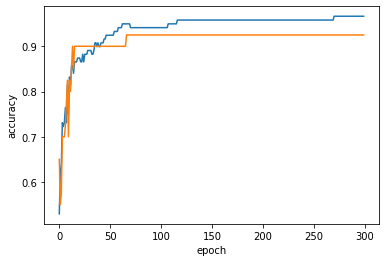

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위 그래프에서 백 번째 에포크 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어진다. 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.

In [21]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. tol 매개변수에 향상될 최소값을 지정한다. 위 코드에서는 tol 매개변수를 None으로 설정해 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 했다.

In [22]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


loss 매개변수의 기본값은 'hinge' 이다. **힌지 손실(hinge loss)**은 **서포트 벡터 머신(support vector machine)**이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.